In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### Step 1: Sentence Segmentation
### Step 2: Word Tokenization
### Step 3: Predicting Parts of Speech for Each Token
We can do this by feeding each word (and some extra words around it for context) into a pre-trained part-of-speech classification model
### Step 4: Text Lemmatization
### Step 5: Identifying Stop Words

## Read-in The Tweets

In [2]:
# read in the tweets
tweets = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding= 'unicode_escape')

In [3]:
print('Rows:',tweets.shape[0], 'Columns:', tweets.shape[1])
tweets.head()

Rows: 9093 Columns: 3


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# rename and simplfiy the column names
tweets.rename(columns={'emotion_in_tweet_is_directed_at': 'tweet_subject',  # use the rename() function
                       'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

tweets.columns  # check the new column names

Index(['tweet_text', 'tweet_subject', 'emotion'], dtype='object')

## EDA

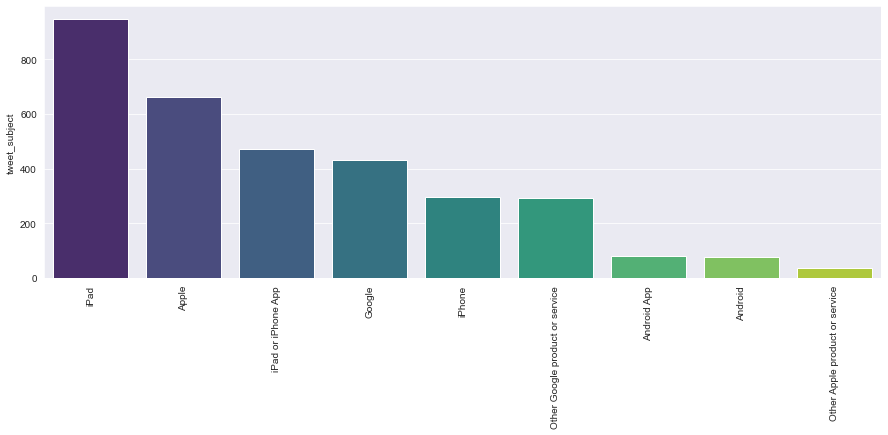

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(y = tweets['tweet_subject'].value_counts(), 
            x = tweets['tweet_subject'].value_counts().index, palette='viridis', )
plt.xticks(rotation = 90)
plt.show()

In [6]:
# rename and simplfiy the column names
tweets.rename(columns={'emotion_in_tweet_is_directed_at': 'tweet_subject',  # use the rename() function
                       'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

tweets.columns  # check the new column names

Index(['tweet_text', 'tweet_subject', 'emotion'], dtype='object')

In [7]:
tweets['emotion'].unique()  # check what are the distinct classes

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [8]:
# rename and simplify the classes
tweets['emotion'] = tweets.emotion.map(lambda x: 'postive' if x == 'Positive emotion' else
                                      ('negative' if x == 'Negative emotion' else
                                      (x if x == "I can't tell" else 'neutral')))

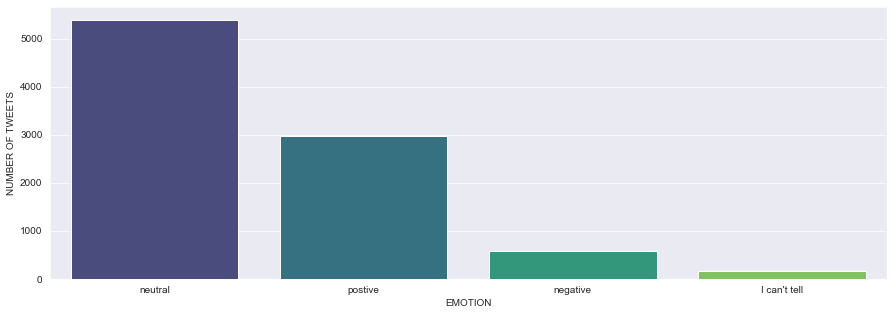

In [9]:
plt.figure(figsize=(15,5))  # see the distribution of classes

sns.barplot(y = tweets['emotion'].value_counts(dropna = False),  # use seaborn to plot bar graph
            x = tweets['emotion'].value_counts(dropna = False).index, palette='viridis' )
plt.ylabel('number of tweets'.upper())  # label the axis'
plt.xlabel('emotion'.upper())
plt.show()

In [53]:
data = tweets['tweet_text']
target = tweets['emotion']

In [11]:
import string, re
puncs = list(string.punctuation)
print(puncs)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [12]:
pattern = r'(@[\w\d]+)'  # to remove any mentions from the tweets 
pattern_2 = r'(https[\S]+|www\.[\S]+)'  # to remove any links/url

In [13]:
# replace mentions and urls from the tweets
tweets['tweet_text'] = tweets['tweet_text'].str.replace(pattern, '')
tweets['tweet_text'] = tweets['tweet_text'].str.replace(pattern_2, '')

In [14]:
# remove punctuations that are used for emoticons
print('length before:' , len(puncs))
imp_puncs = ["'",'(', ')', ':', ';','/','|']

for punc in imp_puncs:
    puncs.remove(punc)
print('length after:', len(puncs))

length before: 32
length after: 25


In [54]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')  # should I remove some stopwords?
print(len(sw_list))

sw_list += puncs  # should I have kept all the punctuations?
sw_list += ['sxsw']  # what other common words can be removed: ipad? google?
            
sw_set = set(sw_list)
print(len(sw_set))

179
205


In [55]:
# we can define a function that removes stopwords 
def process_tweets(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [56]:
# applying the above function to our data/features 
processed_tweets = list(map(process_tweets, str(data)))

In [57]:
total_vocab = set()
for comment in processed_tweets:
    total_vocab.update(comment)
len(total_vocab)

45